In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..\\..'))
	print(os.getcwd())
except:
	pass


 # Elo Algorithm Demo

In [1]:
# Import libraries
import models
from models import EloModel
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Train all-time Elo scores
years = range(2005, 2020)
teams = models.get_teams(years)

model = EloModel(teams, k=10, n=400, i=1000, logging=True)

print(f"Training on {','.join(map(str,years))}")
print('='*35)
start = time.time()
winners = []

for year in years:
    filename = f"../data/{year}_MatchData_ol.csv"
    data = pd.read_csv(filename)
    data = models.process_data(data)
    data = models.sort_data(data)
    winners.append(data.winner)

    print(f"Year: {year}")
    print(f"Simulating {len(data)} matches")
    substart = time.time()

    data.apply(model.train, axis=1)

    print(f"Training time: {int(time.time() - substart)} s")
    print("="*35)

    model.export(f"data/{year}_end_elos.csv")

print(f"Training Time: {int(time.time() - start)} s")
print(f"Brier score: {model.test(pd.concat(winners))}")



Training on 2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year: 2005
Simulating 2068 matches
Training time: 18 s
Year: 2006
Simulating 3184 matches
Training time: 23 s
Year: 2007
Simulating 3564 matches
Training time: 27 s
Year: 2008
Simulating 4038 matches
Training time: 29 s
Year: 2009
Simulating 4658 matches
Training time: 33 s
Year: 2010
Simulating 5567 matches
Training time: 41 s
Year: 2011
Simulating 6312 matches
Training time: 44 s
Year: 2012
Simulating 7707 matches
Training time: 57 s
Year: 2013
Simulating 8242 matches
Training time: 61 s
Year: 2014
Simulating 10663 matches
Training time: 79 s
Year: 2015
Simulating 11810 matches
Training time: 87 s
Year: 2016
Simulating 13286 matches
Training time: 94 s
Year: 2017
Simulating 15429 matches
Training time: 109 s
Year: 2018
Simulating 16930 matches
Training time: 120 s
Year: 2019
Simulating 18022 matches
Training time: 132 s
Training Time: 963 s
Brier score: 0.20091085555534363


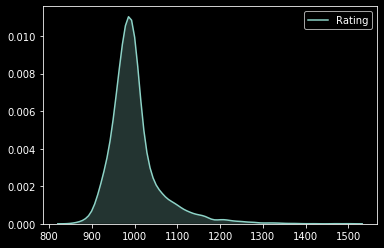

In [3]:
sns.kdeplot(model.table.Rating, shade=True)
plt.show()


In [4]:
model.table.head(25)


,Rating,Rank
Team,,
254,1500.620880,1.0
2056,1470.503105,2.0
1678,1418.332292,3.0
118,1387.946492,4.0
1114,1373.914031,5.0
2767,1369.940402,6.0
148,1361.142735,7.0
195,1346.760746,8.0
2481,1345.316858,9.0


In [6]:
trained = EloModel(logging=True)
trained.load("data/2018_end_elos.csv")

filename = f"../data/{2019}_MatchData_ol.csv"
data = pd.read_csv(filename)
data = models.process_data(data)
data = models.sort_data(data)

print(f"Year: {year}")
print(f"Simulating {len(data)} matches")
substart = time.time()

data.apply(trained.train, axis=1)

print(f"Training time: {int(time.time() - substart)} s")
print("="*35)

print(f"Brier: {trained.test(data.winner)}")

Year: 2019
Simulating 18022 matches
Training time: 138 s
Brier: 0.1954536531719193
